In [1]:
%load_ext autoreload
%autoreload 2

from setup_func import *

from decision_models.utils import store_modout, model_comparison

from tqdm import tqdm
from kkplot import kk_boxplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
path_to_summary = f'{data_dir}/clean_all_group_df_summary.csv'
path_to_longform = f'{data_dir}/clean_all_group_longform.csv'

summary_df = pd.read_csv(path_to_summary, index_col=0)
longform = pd.read_csv(path_to_longform, index_col=0)

alcohol_longform = longform[longform['Group'] == 'alcohol']
cannabis_longform = longform[longform['Group'] == 'cannabis']

In [3]:
batches = {
    'alcohol': None,
    'cannabis': None,
}

## Alcohol, cannabis, binge data load

In [4]:
modout_dict = {}

In [5]:
modout = {}

save_fit_path='/Users/kulkarnik/LocalProjects/SlotsTasks_simplified_rhoads/outputs/decision/'
if not os.path.exists(save_fit_path):
    os.makedirs(save_fit_path)
if os.path.exists(f'{save_fit_path}/alcohol_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{save_fit_path}/alcohol_decision_models.pkl', 'rb') as f:
        modout = pickle.load(f)

modout_dict['Alcohol'] = modout

modout = {}

save_fit_path='/Users/kulkarnik/LocalProjects/SlotsTasks_simplified_rhoads/outputs/decision/'
if not os.path.exists(save_fit_path):
    os.makedirs(save_fit_path)
if os.path.exists(f'{save_fit_path}/cannabis_decision_models.pkl'):
    print('Loading existing decision models')
    with open(f'{save_fit_path}/cannabis_decision_models.pkl', 'rb') as f:
        modout = pickle.load(f)

modout_dict['Cannabis'] = modout


Loading existing decision models
Loading existing decision models


['beta', 'lr', 'mod']
          beta        lr       mod
beta  1.000000 -0.144854 -0.084341
lr   -0.144854  1.000000  0.261823
mod  -0.084341  0.261823  1.000000


SignificanceResult(statistic=0.35683475207084775, pvalue=0.002817455194817664)

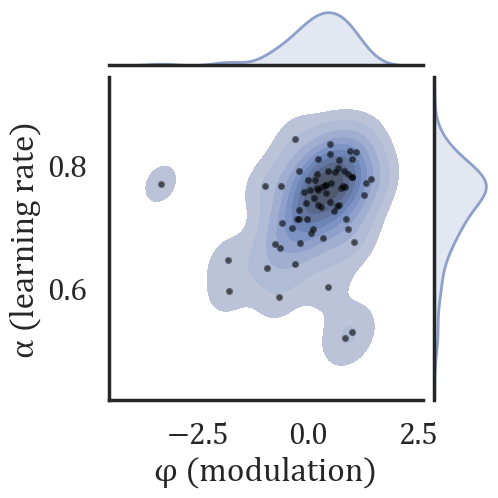

In [6]:
print(modout_dict['Alcohol'][f'd_lrbias_rw_other']['fit']['param_names'])
brief_param_df = pd.DataFrame(modout_dict['Alcohol'][f'd_lrbias_rw_other']['fit']['params'], columns=modout_dict['Alcohol'][f'd_lrbias_rw_other']['fit']['param_names'])
grid = sns.jointplot(data=brief_param_df, x='mod', y='lr', kind='kde', fill=True, color=sns.palettes.color_palette('Set2')[2], height=5.5)
grid.ax_joint.scatter(brief_param_df['mod'], brief_param_df['lr'], color='black', alpha=0.45, s=10)
grid.ax_joint.set_xlabel('')
grid.ax_joint.set_ylabel('')
print(brief_param_df.corr())
grid.ax_joint.set_ylabel('α (learning rate)')
grid.ax_joint.set_xlabel('φ (modulation)')
stats.spearmanr(brief_param_df['mod'], brief_param_df['lr'])

Text(0.5, 0, 'β (inverse temperature)')

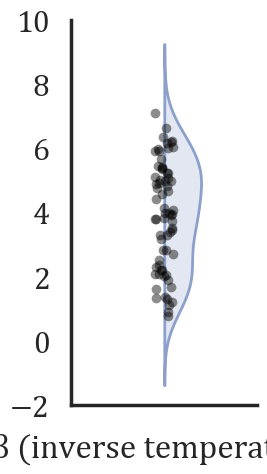

In [7]:
# split violin plot
fig, ax = plt.subplots(figsize=(2.4, 5))
sns.kdeplot(y=brief_param_df['beta'], color=sns.palettes.color_palette('Set2')[2], fill=True, ax=ax)
sns.stripplot(y=brief_param_df['beta'], color='black', alpha=0.45, s=7, jitter=0.05, ax=ax)
ax.set_ylim(-2, 10)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
ax.set_xlabel('β (inverse temperature)')

['beta', 'lr', 'mod']
          beta        lr       mod
beta  1.000000 -0.285544  0.115534
lr   -0.285544  1.000000 -0.296627
mod   0.115534 -0.296627  1.000000


SignificanceResult(statistic=-0.2641523838607474, pvalue=0.02950342245177966)

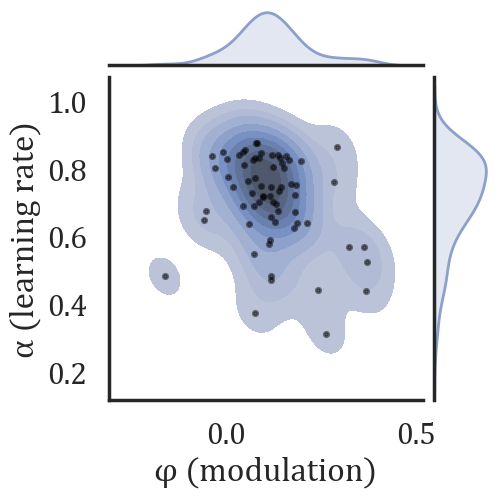

In [8]:
print(modout_dict['Alcohol'][f'o_add_rewbias_rw_money']['fit']['param_names'])
brief_param_df = pd.DataFrame(modout_dict['Alcohol'][f'o_add_rewbias_rw_money']['fit']['params'], columns=modout_dict['Alcohol'][f'o_add_rewbias_rw_money']['fit']['param_names'])
grid = sns.jointplot(data=brief_param_df, x='mod', y='lr', kind='kde', fill=True, color=sns.palettes.color_palette('Set2')[2], height=5.5)
grid.ax_joint.scatter(brief_param_df['mod'], brief_param_df['lr'], color='black', alpha=0.45, s=10)
grid.ax_joint.set_xlabel('')
grid.ax_joint.set_ylabel('')
print(brief_param_df.corr())
grid.ax_joint.set_ylabel('α (learning rate)')
grid.ax_joint.set_xlabel('φ (modulation)')
stats.spearmanr(brief_param_df['lr'], brief_param_df['mod'])

Text(0.5, 0, 'β (inverse temperature)')

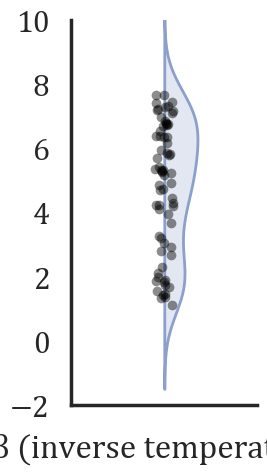

In [9]:
fig, ax = plt.subplots(figsize=(2.4, 5))
sns.kdeplot(y=brief_param_df['beta'], color=sns.palettes.color_palette('Set2')[2], fill=True, ax=ax)
sns.stripplot(y=brief_param_df['beta'], color='black', alpha=0.45, s=7, jitter=0.05, ax=ax)
ax.set_ylim(-2, 10)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
ax.set_xlabel('β (inverse temperature)')

['beta', 'lr', 'mod']
          beta        lr       mod
beta  1.000000 -0.191222 -0.286574
lr   -0.191222  1.000000  0.485459
mod  -0.286574  0.485459  1.000000


SignificanceResult(statistic=0.44038461538461543, pvalue=0.0002414956814931427)

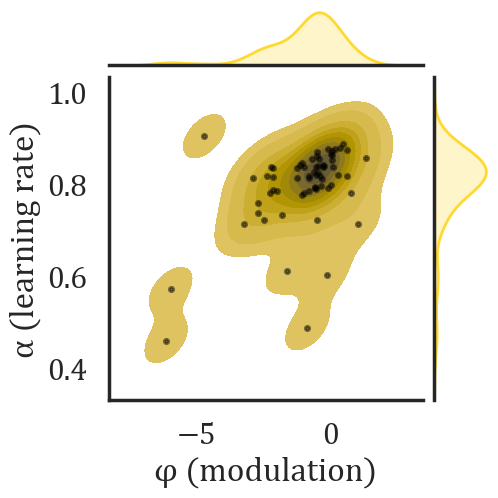

In [10]:
print(modout_dict['Cannabis'][f'd_lrbias_rw_other']['fit']['param_names'])
brief_param_df = pd.DataFrame(modout_dict['Cannabis'][f'd_lrbias_rw_other']['fit']['params'], columns=modout_dict['Cannabis'][f'd_lrbias_rw_other']['fit']['param_names'])
grid = sns.jointplot(data=brief_param_df, x='mod', y='lr', kind='kde', fill=True, color=sns.palettes.color_palette('Set2')[5], height=5.5)
grid.ax_joint.scatter(brief_param_df['mod'], brief_param_df['lr'], color='black', alpha=0.45, s=10)
grid.ax_joint.set_xlabel('')
grid.ax_joint.set_ylabel('')
print(brief_param_df.corr())
grid.ax_joint.set_ylabel('α (learning rate)')
grid.ax_joint.set_xlabel('φ (modulation)')
stats.spearmanr(brief_param_df['mod'], brief_param_df['lr'])

Text(0.5, 0, 'β (inverse temperature)')

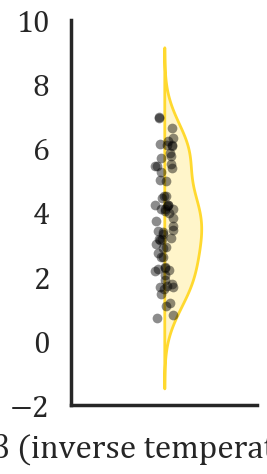

In [11]:
fig, ax = plt.subplots(figsize=(2.4, 5))
sns.kdeplot(y=brief_param_df['beta'], color=sns.palettes.color_palette('Set2')[5], fill=True, ax=ax)
sns.stripplot(y=brief_param_df['beta'], color='black', alpha=0.45, s=7, jitter=0.05, ax=ax)
ax.set_ylim(-2, 10)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
ax.set_xlabel('β (inverse temperature)')

['beta', 'lr', 'mod']
          beta        lr       mod
beta  1.000000 -0.426500  0.175799
lr   -0.426500  1.000000 -0.475517
mod   0.175799 -0.475517  1.000000


SignificanceResult(statistic=-0.37373251748251746, pvalue=0.0021649702607210997)

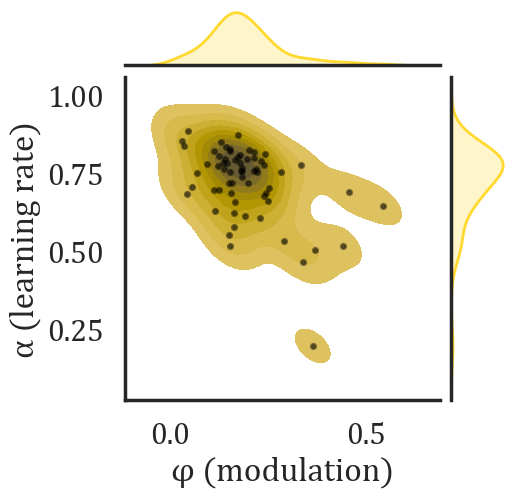

In [12]:
print(modout_dict['Cannabis'][f'o_add_rewbias_rw_money']['fit']['param_names'])
brief_param_df = pd.DataFrame(modout_dict['Cannabis'][f'o_add_rewbias_rw_money']['fit']['params'], columns=modout_dict['Cannabis'][f'o_add_rewbias_rw_money']['fit']['param_names'])
grid = sns.jointplot(data=brief_param_df, x='mod', y='lr', kind='kde', fill=True, color=sns.palettes.color_palette('Set2')[5], height=5.5)
grid.ax_joint.scatter(brief_param_df['mod'], brief_param_df['lr'], color='black', alpha=0.45, s=10)
grid.ax_joint.set_xlabel('')
grid.ax_joint.set_ylabel('')
print(brief_param_df.corr())
grid.ax_joint.set_ylabel('α (learning rate)')
grid.ax_joint.set_xlabel('φ (modulation)')
stats.spearmanr(brief_param_df['lr'], brief_param_df['mod'])

Text(0.5, 0, 'β (inverse temperature)')

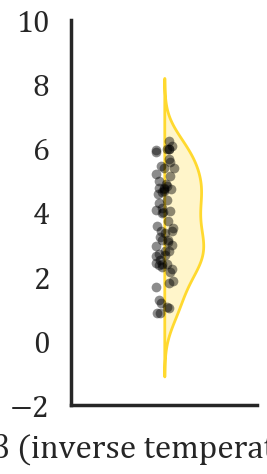

In [13]:
fig, ax = plt.subplots(figsize=(2.4, 5))
sns.kdeplot(y=brief_param_df['beta'], color=sns.palettes.color_palette('Set2')[5], fill=True, ax=ax)
sns.stripplot(y=brief_param_df['beta'], color='black', alpha=0.45, s=7, jitter=0.05, ax=ax)
ax.set_ylim(-2, 10)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine()
ax.set_xlabel('β (inverse temperature)')

In [14]:
# Extract all relevant parameters from the LRbias and AddRewbias models
param_table = pd.DataFrame()
chosen_models = ['d_lrbias_rw', 'o_add_rewbias_rw']

for group in modout_dict.keys():
    for chosen_model in chosen_models:
        for idx, param_name in enumerate(modout_dict[group][f'{chosen_model}_money']['fit']['param_names']):
            for money_param_est, other_param_est in zip(
                modout_dict[group][f'{chosen_model}_money']['fit']['params'][:, idx], 
                modout_dict[group][f'{chosen_model}_other']['fit']['params'][:, idx]
            ):
                money_est_df = pd.DataFrame({
                    'Group': [group],
                    'Model': [chosen_model],
                    'Block': ['money'],
                    'Param': [param_name],
                    'Est': [money_param_est]
                })
                param_table = pd.concat([param_table, money_est_df])
                other_est_df = pd.DataFrame({
                    'Group': [group],
                    'Model': [chosen_model],
                    'Block': ['other'],
                    'Param': [param_name],
                    'Est': [other_param_est]
                })
                param_table = pd.concat([param_table, other_est_df])
                diff_est_df = pd.DataFrame({
                    'Group': [group],
                    'Model': [chosen_model],
                    'Block': ['diff'],
                    'Param': [param_name],
                    'Est': [other_param_est - money_param_est]
                })
                param_table = pd.concat([param_table, diff_est_df], ignore_index=True)

In [15]:
param_table

,Group,Model,Block,Param,Est
0,Alcohol,d_lrbias_rw,money,beta,4.036589
1,Alcohol,d_lrbias_rw,other,beta,3.529321
2,Alcohol,d_lrbias_rw,diff,beta,-0.507268
3,Alcohol,d_lrbias_rw,money,beta,4.842399
4,Alcohol,d_lrbias_rw,other,beta,5.449954
...,...,...,...,...,...
2389,Cannabis,o_add_rewbias_rw,other,mod,0.220065
2390,Cannabis,o_add_rewbias_rw,diff,mod,0.006589
2391,Cannabis,o_add_rewbias_rw,money,mod,0.195213
2392,Cannabis,o_add_rewbias_rw,other,mod,0.176034


beta	Alcohol	t=19.312	p=0.000
beta	Cannabis	t=18.272	p=0.000
lr	Alcohol	t=89.243	p=0.000
lr	Cannabis	t=74.305	p=0.000
mod	Alcohol	t=2.159	p=0.034
mod	Cannabis	t=-5.590	p=0.000


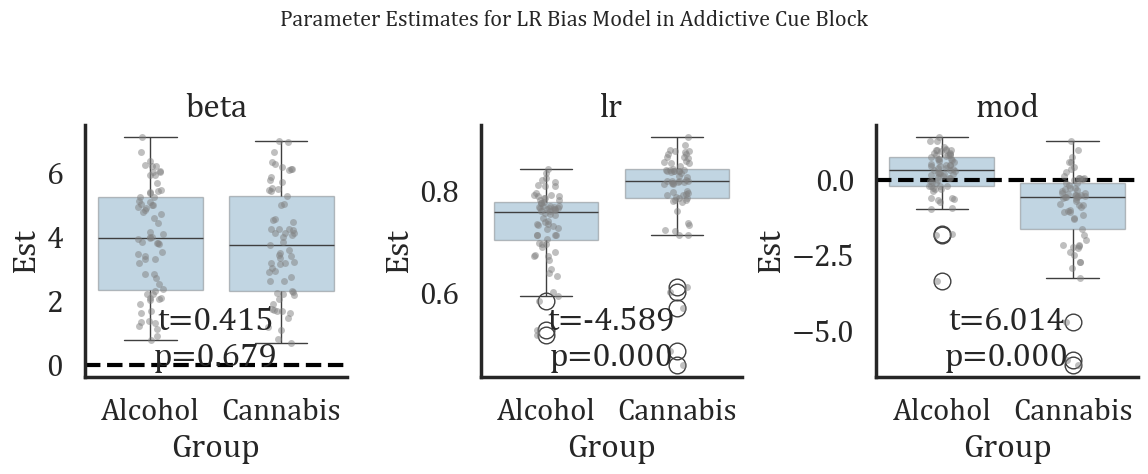

In [16]:
# Plot the parameter estimates for the LR Bias model in the Addictive Cue block
sub_param_table = param_table[
    (param_table['Group'].isin(['Alcohol', 'Cannabis'])) &
    (param_table['Block']=='other') &
    (param_table['Model']=='d_lrbias_rw')
]
sub_param_table

fig, ax = plt.subplots(figsize=(12,5), ncols=len(sub_param_table['Param'].unique()), facecolor='w')
for i, param in enumerate(sub_param_table['Param'].unique()):
    sns.stripplot(data=sub_param_table[sub_param_table['Param'] == param], x='Group', y='Est', ax=ax[i], alpha=0.5, legend=False, color='gray')
    sns.boxplot(data=sub_param_table[sub_param_table['Param'] == param], x='Group', y='Est', ax=ax[i], boxprops=dict(alpha=.3))
    ax[i].set_title(param)
    if param != 'lr':
        ax[i].axhline(0, color='black', linestyle='--')
    sns.despine(ax=ax[i])
    # Annotate with independent t-test results
    t, p = stats.ttest_ind(
        sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'],
        sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est']
    )
    ax[i].annotate(f't={t:.3f}\np={p:.3f}', xy=(0.5, 0.15), xycoords='axes fraction', ha='center', va='center')
    # print the t-test results for each group vs 0
    t, p = stats.ttest_1samp(sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'], 0)
    print(f'{param}\tAlcohol\tt={t:.3f}\tp={p:.3f}')
    t, p = stats.ttest_1samp(sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est'], 0)
    print(f'{param}\tCannabis\tt={t:.3f}\tp={p:.3f}')

    # t, p = stats.ttest_1samp(sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['block'] == 'diff')]['Est'], 0)
    # ax[i].annotate(f't={t:.3f}\np={p:.3f}', xy=(0.835, 0.8), xycoords='axes fraction', ha='center', va='center')

fig.suptitle(f'Parameter Estimates for LR Bias Model in Addictive Cue Block', fontsize=16)
plt.tight_layout()

In [17]:
sub_param_table

,Group,Model,Block,Param,Est
1,Alcohol,d_lrbias_rw,other,beta,3.529321
4,Alcohol,d_lrbias_rw,other,beta,5.449954
7,Alcohol,d_lrbias_rw,other,beta,1.136403
10,Alcohol,d_lrbias_rw,other,beta,6.007890
13,Alcohol,d_lrbias_rw,other,beta,4.598111
...,...,...,...,...,...
1795,Cannabis,d_lrbias_rw,other,mod,-5.977397
1798,Cannabis,d_lrbias_rw,other,mod,-0.345781
1801,Cannabis,d_lrbias_rw,other,mod,-3.242895
1804,Cannabis,d_lrbias_rw,other,mod,-0.378423


beta	t=0.415		p=0.679
Alcohol: 3.915 +/- 1.672
Cannabis: 3.794 +/- 1.674

lr	t=-4.589		p=0.000
Alcohol: 0.736 +/- 0.068
Cannabis: 0.798 +/- 0.087

mod	t=6.014		p=0.000
Alcohol: 0.209 +/- 0.798
Cannabis: -0.995 +/- 1.435



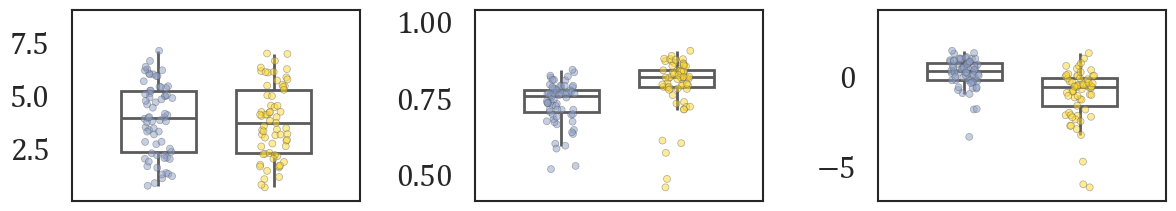

In [19]:
fig, ax = kk_boxplot(
    df=sub_param_table,
    xvar='Param',
    yvar='Est',
    huevar='Group',
    figsize=(78*mm,19*mm),
    num_x=3,
)
ax[0].set_title('')
ax[1].set_title('')
ax[2].set_title('')
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])
# delete ax[3]
# fig.delaxes(ax[3])
plt.suptitle('', fontsize=16)
for i, param in enumerate(sub_param_table['Param'].unique()):
    t, p = stats.ttest_ind(
        sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'],
        sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est']
    )
    # ax[i].annotate(f't={t:.3f}\np={p:.3f}', xy=(0.5, 0.15), xycoords='axes fraction', ha='center', va='center')
    print(f'{param}\tt={t:.3f}\t\tp={p:.3f}')
    # print mean and std for each group
    print(f"Alcohol: {sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'].mean():.3f} +/- {sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'].std():.3f}")
    print(f"Cannabis: {sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est'].mean():.3f} +/- {sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est'].std():.3f}")
    print()
plt.tight_layout()

beta	Alcohol	t=19.463	p=0.000
beta	Cannabis	t=19.781	p=0.000
lr	Alcohol	t=44.677	p=0.000
lr	Cannabis	t=49.928	p=0.000
mod	Alcohol	t=9.812	p=0.000
mod	Cannabis	t=15.831	p=0.000


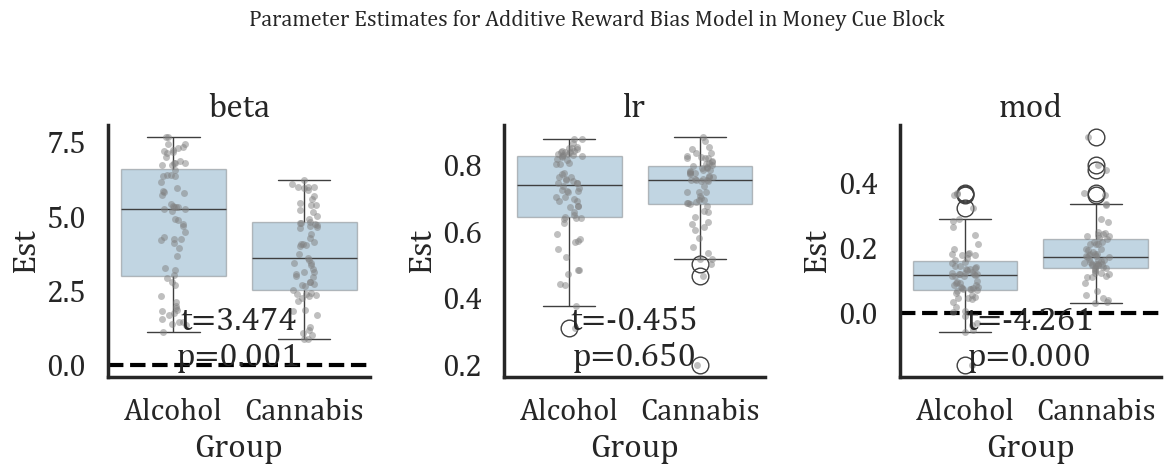

In [20]:
# Plot the parameter estimates for the Additive Rew Bias model in the Money Cue block
sub_param_table = param_table[
    (param_table['Group'].isin(['Alcohol', 'Cannabis'])) &
    (param_table['Block']=='money') &
    (param_table['Model']=='o_add_rewbias_rw')
]
sub_param_table

fig, ax = plt.subplots(figsize=(12,5), ncols=len(sub_param_table['Param'].unique()), facecolor='w')
for i, param in enumerate(sub_param_table['Param'].unique()):
    sns.stripplot(data=sub_param_table[sub_param_table['Param'] == param], x='Group', y='Est', ax=ax[i], alpha=0.5, legend=False, color='gray')
    sns.boxplot(data=sub_param_table[sub_param_table['Param'] == param], x='Group', y='Est', ax=ax[i], boxprops=dict(alpha=.3))
    ax[i].set_title(param)
    if param != 'lr':
        ax[i].axhline(0, color='black', linestyle='--')
    sns.despine(ax=ax[i])
    # Annotate with independent t-test results
    t, p = stats.ttest_ind(
        sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'],
        sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est']
    )
    ax[i].annotate(f't={t:.3f}\np={p:.3f}', xy=(0.5, 0.15), xycoords='axes fraction', ha='center', va='center')
    # print the t-test results for each group vs 0
    t, p = stats.ttest_1samp(sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'], 0)
    print(f'{param}\tAlcohol\tt={t:.3f}\tp={p:.3f}')
    t, p = stats.ttest_1samp(sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est'], 0)
    print(f'{param}\tCannabis\tt={t:.3f}\tp={p:.3f}')

    # t, p = stats.ttest_1samp(sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['block'] == 'diff')]['Est'], 0)
    # ax[i].annotate(f't={t:.3f}\np={p:.3f}', xy=(0.835, 0.8), xycoords='axes fraction', ha='center', va='center')

fig.suptitle(f'Parameter Estimates for Additive Reward Bias Model in Money Cue Block', fontsize=16)
plt.tight_layout()

beta	t=3.474		p=0.001
Alcohol: 4.790 +/- 2.030
Cannabis: 3.708 +/- 1.512

lr	t=-0.455		p=0.650
Alcohol: 0.712 +/- 0.131
Cannabis: 0.722 +/- 0.117

mod	t=-4.261		p=0.000
Alcohol: 0.118 +/- 0.099
Cannabis: 0.190 +/- 0.097



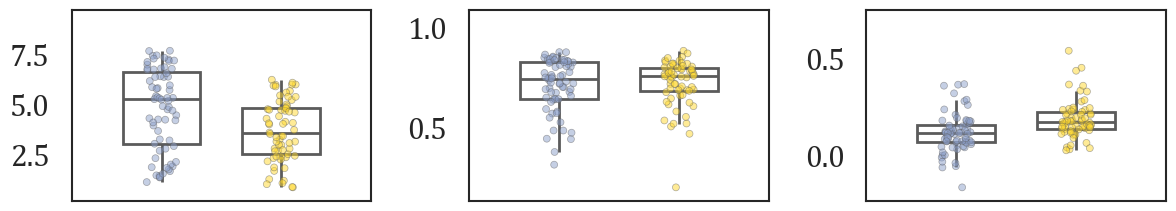

In [22]:
fig, ax = kk_boxplot(
    df=sub_param_table,
    xvar='Param',
    yvar='Est',
    huevar='Group',
    figsize=(78*mm,19*mm),
    num_x=3,
)
ax[0].set_title('')
ax[1].set_title('')
ax[2].set_title('')
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])
# delete ax[3]
# fig.delaxes(ax[3])
plt.suptitle('', fontsize=16)
for i, param in enumerate(sub_param_table['Param'].unique()):
    t, p = stats.ttest_ind(
        sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'],
        sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est']
    )
    # ax[i].annotate(f't={t:.3f}\np={p:.3f}', xy=(0.5, 0.15), xycoords='axes fraction', ha='center', va='center')
    print(f'{param}\tt={t:.3f}\t\tp={p:.3f}')
    # print mean and std for each group
    print(f"Alcohol: {sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'].mean():.3f} +/- {sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Alcohol')]['Est'].std():.3f}")
    print(f"Cannabis: {sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est'].mean():.3f} +/- {sub_param_table[(sub_param_table['Param'] == param) & (sub_param_table['Group'] == 'Cannabis')]['Est'].std():.3f}")
    print()
plt.tight_layout()